In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [94]:
# Load the csv file
loan = pd.read_csv("loan.csv", low_memory=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 300)
pd.get_option("display.max_columns")

In [95]:
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to ...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [96]:
loan.shape

(39717, 111)

In [97]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

# Cleaning Data

## 1. Remove columns containing only Null Data
54 columns in the dataset are 'NA'. Hence removing the columns where all the values are null

In [98]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [99]:
loan_df = loan.dropna(axis=1, how='all')

In [100]:
# Now the columns have reduced to 57
loan_df.shape

(39717, 57)

In [101]:
loan_df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

## 2. Removing duplicates
There are no duplicates in the dataset

In [102]:
loan_df = loan_df.drop_duplicates()

In [103]:
loan_df.shape

(39717, 57)

## 3. Removing Customer Behaviour Variables

There are some values which are correspond to the post approval of loan. 

These columns do not aid us in determining the factors for loan default hence can be dropped.

In [104]:
customer_behaviour_columns = ['delinq_2yrs', 'earliest_cr_line','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                              'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type']

loan_df = loan_df.drop(columns=customer_behaviour_columns, axis=1)

In [105]:
loan_df.shape

(39717, 36)

In [106]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'mths_since_last_delinq',
       'mths_since_last_record', 'initial_list_status', 'next_pymnt_d',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [107]:
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,initial_list_status,next_pymnt_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,NaN,NaN,f,NaN,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to ...,car,bike,309xx,GA,1.00,NaN,NaN,f,NaN,0.0,1,0,0.0,0,0.0,0.0


#### There are several other columns which do aid us in our analysis:
##### Single valued columns
1. Pymnt_plan
2. initial_list_status
3. collections_12_mths_ex_med
4. policy_code
5. acc_now_delinq
6. chargeoff_within_12_mths
7. delinq_amnt
8. pub_rec_bankruptcies
9. tax_liens

These columns can also be removed

In [108]:
loan_df = loan_df.drop(['next_pymnt_d', 'pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths'], axis = 1)

In [109]:
loan_df.shape

(39717, 26)

## 4. Removing rows where the Loan Status is "Current"

We have to analyse to see if the person is likely to default or not and this can done only with "fully paid" or "Charged Off" columsn. "Current" value causes more confusion since we are unsure to which group they belong to

In [110]:
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

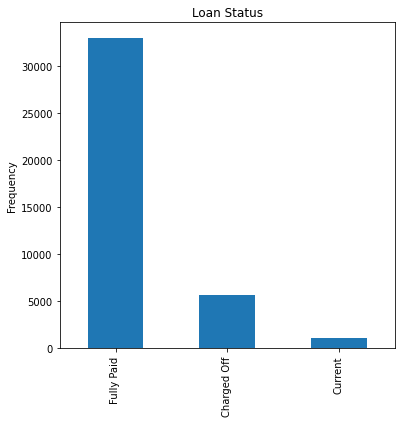

In [111]:
plt.figure(figsize=(6, 6))
loan_df["loan_status"].value_counts().plot.bar()
plt.title("Loan Status")
plt.ylabel("Frequency")
plt.show()

In [112]:
loan_df.drop(loan_df[loan_df["loan_status"] == "Current"].index, inplace=True)

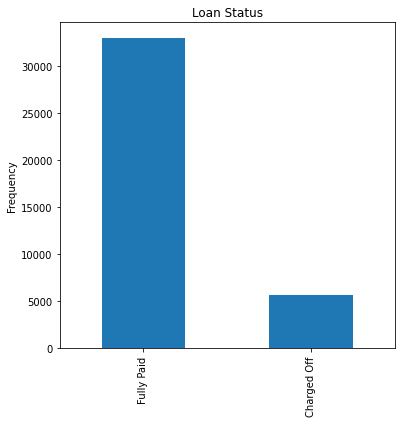

In [113]:
plt.figure(figsize=(6, 6))
loan_df["loan_status"].value_counts().plot.bar()
plt.title("Loan Status")
plt.ylabel("Frequency")
plt.savefig("loan_status.png")
plt.show()

In [114]:
loan_df.shape

(38577, 26)

### Probing other columns:

In [115]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38577 non-null  int64  
 1   member_id               38577 non-null  int64  
 2   loan_amnt               38577 non-null  int64  
 3   funded_amnt             38577 non-null  int64  
 4   funded_amnt_inv         38577 non-null  float64
 5   term                    38577 non-null  object 
 6   int_rate                38577 non-null  object 
 7   installment             38577 non-null  float64
 8   grade                   38577 non-null  object 
 9   sub_grade               38577 non-null  object 
 10  emp_title               36191 non-null  object 
 11  emp_length              37544 non-null  object 
 12  home_ownership          38577 non-null  object 
 13  annual_inc              38577 non-null  float64
 14  verification_status     38577 non-null

### Column - emp_length contains 1033 null values.
Since this is an important column, replacing the values with mode


In [116]:
loan_df.emp_length.mode()

0    10+ years
dtype: object

In [117]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace=True)

In [118]:
loan_df.emp_length.isna().sum()

0

In [119]:
loan_df["grade"].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

# Univariate Analysis

## 1. Loan Status
14.5% of people default on their loans

In [120]:
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

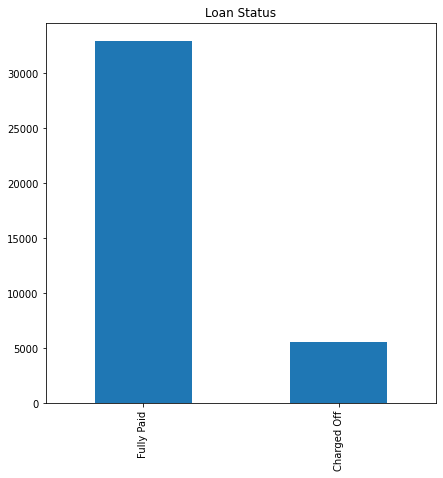

In [121]:
plt.figure(figsize=(7, 7))
loan_df["loan_status"].value_counts().plot.bar()
plt.title("Loan Status")
plt.savefig("loan_status.png")
plt.show()

## 2. Loan Amount
Total amount that has been applied for.

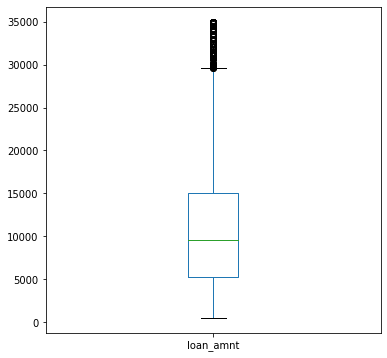

In [122]:
plt.figure(figsize=(6, 6))
loan_df["loan_amnt"].plot.box()
plt.show()

## 3. Funded Amount
Amount that can be lended as loan to the applicant as decided by the agency

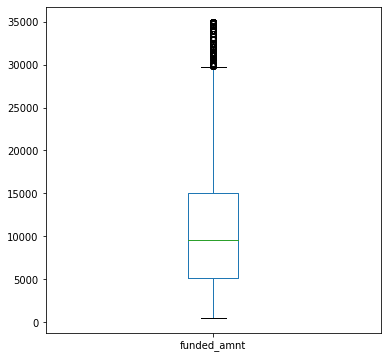

In [123]:
plt.figure(figsize=(6, 6))
loan_df["funded_amnt"].plot.box()
plt.show()

## 4. Funded Amount Invested
Final Amount given to customer as loan

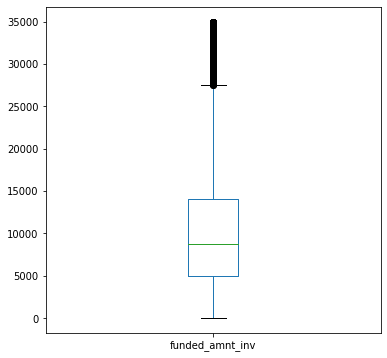

In [124]:
plt.figure(figsize=(6, 6))
loan_df["funded_amnt_inv"].plot.box()
plt.show()

## 5. Term
Only 2 terms - 36 or 60 Months

Loan Duration could be one important factor in determining whether the loan applicant will default or not

In [125]:
loan_df["term"].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

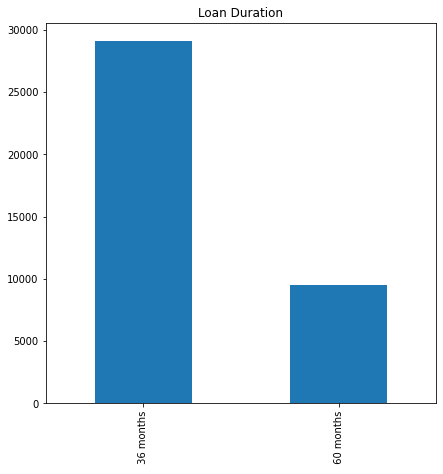

In [126]:
plt.figure(figsize=(7,7))
loan_df["term"].value_counts().plot.bar()
plt.title("Loan Duration")
plt.savefig("term.png")
plt.show()


## 6. Annual Income
Determining the annual income will be a keyfactor to lend out loan

In [127]:
loan["annual_inc"].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

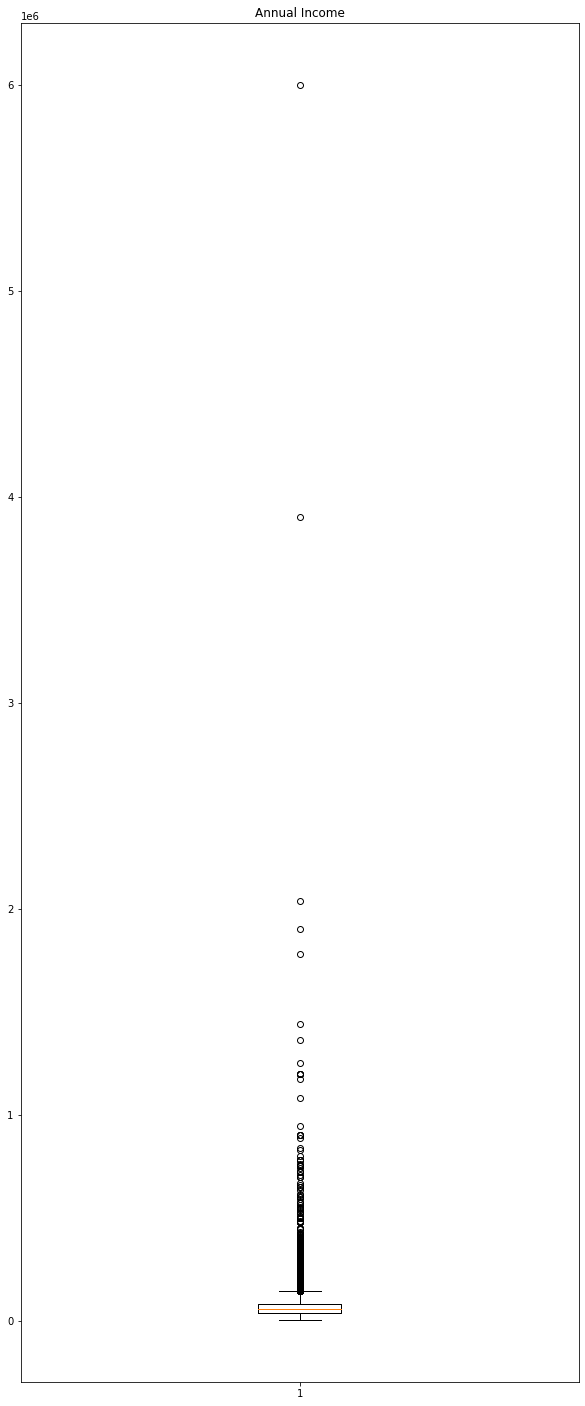

In [128]:
plt.figure(figsize=(10, 25))
plt.boxplot(loan_df["annual_inc"])
plt.title("Annual Income")
plt.show()

The boxplot above clearly indicates the presence of outliers. We will remove outliers that are sparse and at the very top

In [129]:
max = loan_df["annual_inc"].quantile(0.90)
loan_df[loan_df["annual_inc"] <= max]["annual_inc"].count()

34723

In [130]:
print(" The Annual incomes at various levels are : \n")
print(" 99 percentile --> ", loan_df["annual_inc"].quantile(0.99))
print(" 95 percentile --> ", loan_df["annual_inc"].quantile(0.95))
print(" 90 percentile --> ", loan_df["annual_inc"].quantile(0.90))
print(" 75 percentile --> ", loan_df["annual_inc"].quantile(0.75))
print(" 50 percentile --> ", loan_df["annual_inc"].quantile(0.5))

 The Annual incomes at various levels are : 

 99 percentile -->  234143.99999999878
 95 percentile -->  140004.0
 90 percentile -->  115000.0
 75 percentile -->  82000.0
 50 percentile -->  58868.0


In [131]:
annual_income_ninty_percentile = loan_df["annual_inc"].quantile(0.90)
loan_df = loan_df[loan_df["annual_inc"] <= annual_income_ninty_percentile]

In [132]:
loan_df.shape

(34723, 26)

In [133]:
loan_df["annual_inc"].describe()

count     34723.000000
mean      57209.940431
std       23615.526637
min        4000.000000
25%       39600.000000
50%       54912.000000
75%       73600.000000
max      115000.000000
Name: annual_inc, dtype: float64

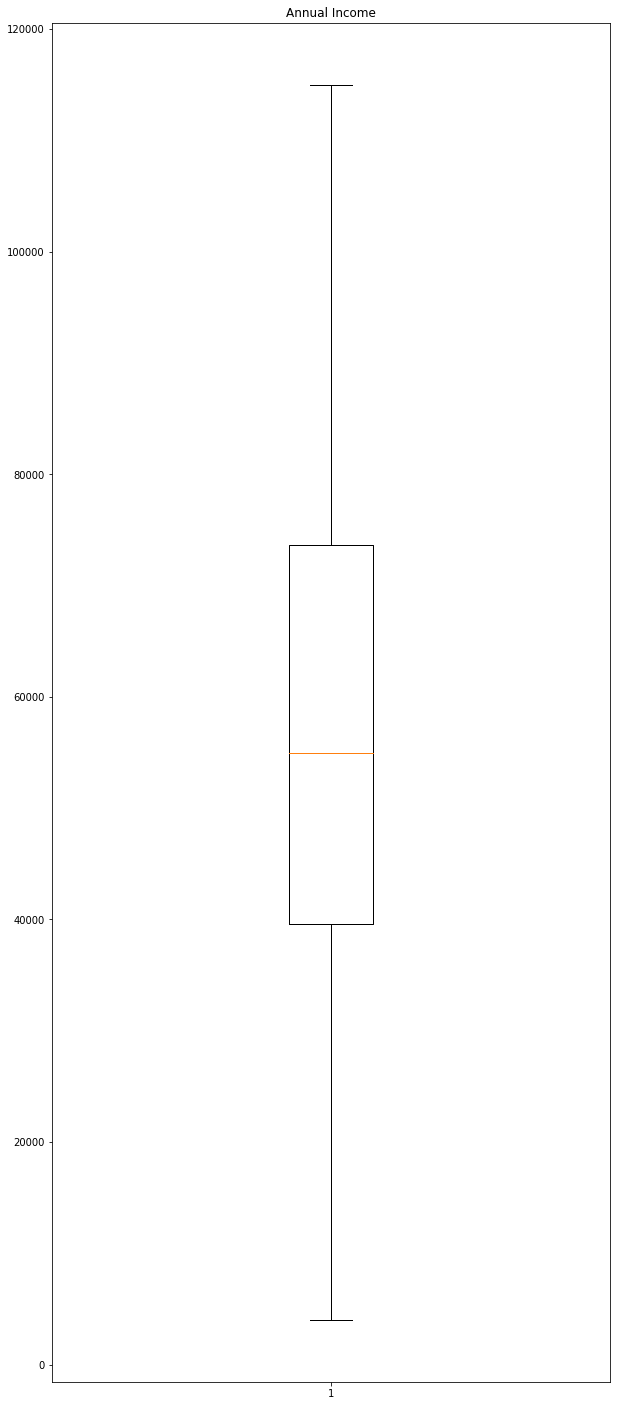

In [134]:
plt.figure(figsize=(10, 25))
plt.boxplot(loan_df["annual_inc"])
plt.title("Annual Income")
plt.savefig("annual_income.png")
plt.show()

## 7. Interest Rates

In [135]:
# Removing the % sign and converting the values to float

loan_df["int_rate"] = loan_df["int_rate"].apply(lambda x: float(x.strip()[:-1]))

In [136]:
loan_df["int_rate"].describe()

count    34723.000000
mean        11.862169
std          3.644937
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

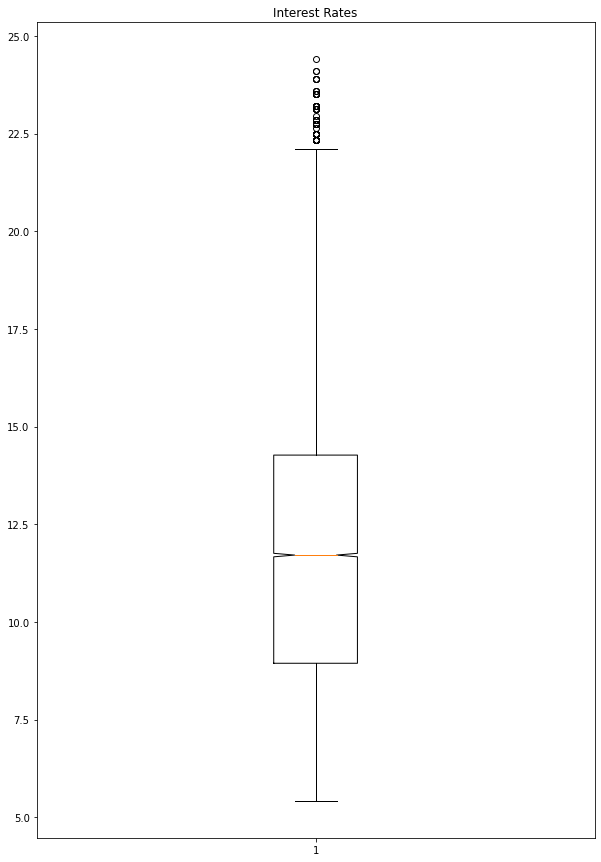

In [143]:
plt.figure(figsize=(10, 15))
plt.boxplot(loan_df["int_rate"], "Orange")
plt.title("Interest Rates")
plt.savefig("int_rate.png")
plt.show()

## 8. Debt to Income Ratio
This column speaks about the size of loan taken by the applicant w.r.t his annual income
Higher the value more chances of defaulting.

In [67]:
loan_df["dti"].describe()

count    34723.000000
mean        13.543985
std          6.675047
min          0.000000
25%          8.450000
50%         13.710000
75%         18.840000
max         29.990000
Name: dti, dtype: float64

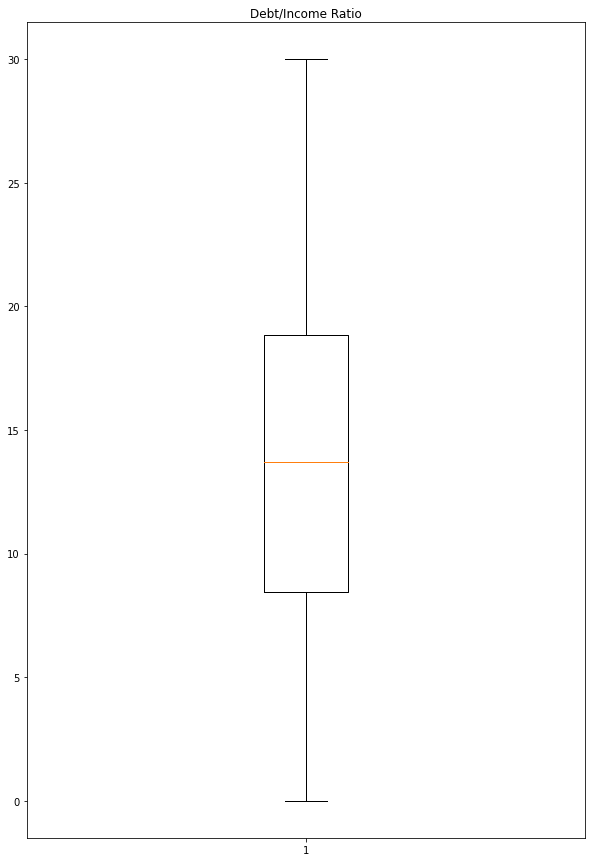

In [87]:
plt.figure(figsize=(10, 15))
plt.boxplot(loan_df["dti"])
plt.title("Debt/Income Ratio")
plt.savefig("dti.png")
plt.show()

## 9. verification_status
Was the applicant subject to due delligence before giving him loan

In [144]:
loan_df["verification_status"].value_counts()

Not Verified       15723
Verified           10298
Source Verified     8702
Name: verification_status, dtype: int64

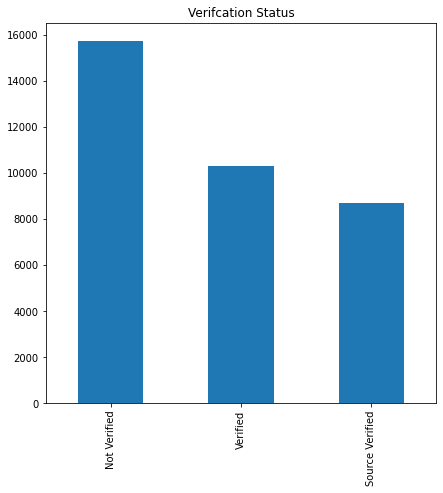

In [145]:
plt.figure(figsize=(7, 7))
loan_df["verification_status"].value_counts().plot.bar()
plt.title("Verifcation Status")
plt.savefig("verification.png")
plt.show()

## 10. Employment Length
How long has the applicant been employed. Ideally, longer the employment, better the loan repayment capacity

In [71]:
loan_df["emp_length"].value_counts()

10+ years    8267
< 1 year     4125
2 years      3939
3 years      3630
4 years      3055
1 year       2919
5 years      2907
6 years      1970
7 years      1567
8 years      1260
9 years      1084
Name: emp_length, dtype: int64

In [72]:
years = list(loan_df["emp_length"].value_counts().index)
count = list(loan_df["emp_length"].value_counts().values)

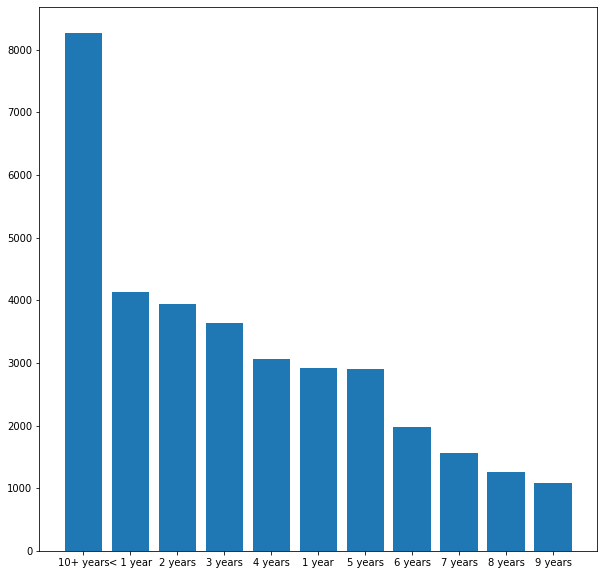

In [73]:
plt.figure(figsize=(10, 10))
plt.bar(years, count)
plt.show()

## 11. Purpose of Loan

In [156]:
loan_df["purpose"].value_counts()

debt_consolidation    16488
credit_card            4496
other                  3544
home_improvement       2314
major_purchase         1947
small_business         1512
car                    1388
wedding                 844
medical                 609
moving                  516
vacation                352
house                   319
educational             305
renewable_energy         89
Name: purpose, dtype: int64

In [157]:
loan_df.shape

(34723, 27)

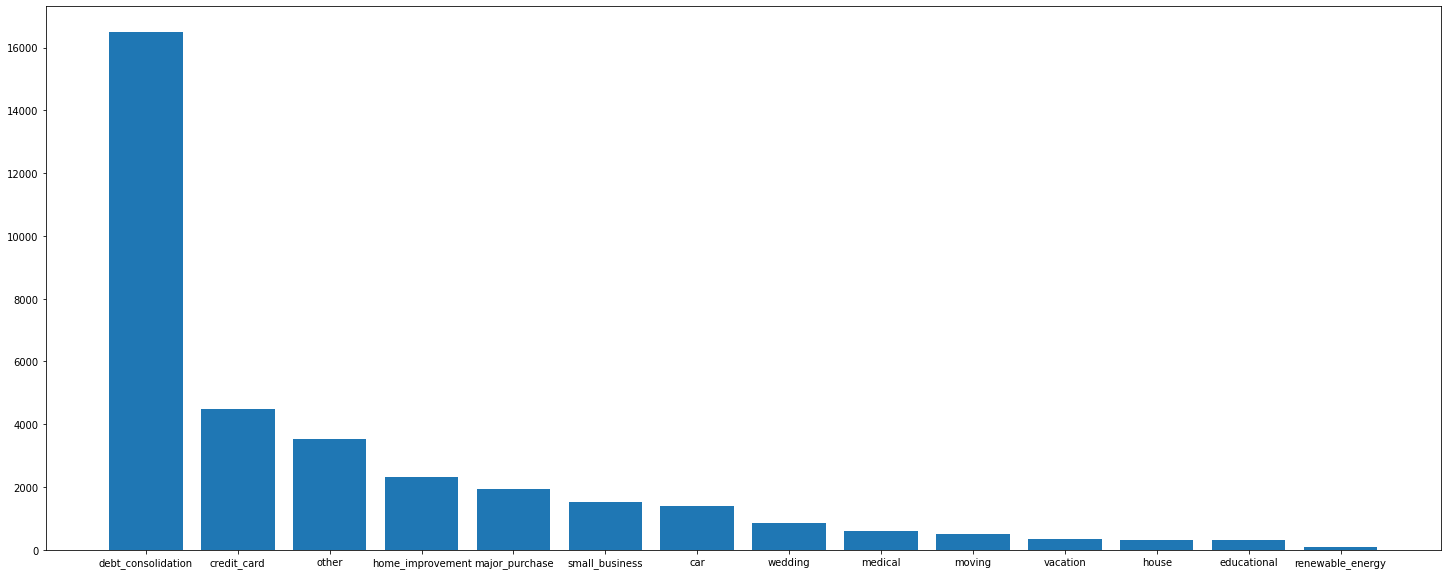

In [155]:
purpose = list(loan_df["purpose"].value_counts().index)
count = list(loan_df["purpose"].value_counts().values)
plt.figure(figsize=(25, 10))
plt.bar(purpose, count)
plt.savefig("purpose.png")
plt.show()

## 12. Home ownership

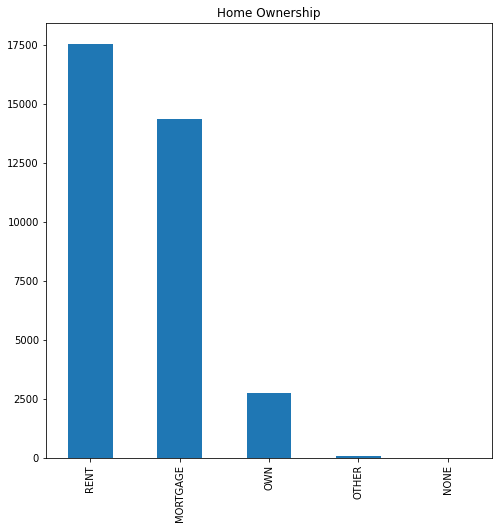

In [76]:
plt.figure(figsize=(8, 8))
loan_df["home_ownership"].value_counts().plot.bar()
plt.title("Home Ownership")
plt.show()

## 13. Issue Date

In [147]:
# loan_df[loan_df["loan_status"] == "Charged Off"]["issue_d"].value_counts()
## Extracting month and year
df_month_year = loan_df['issue_d'].str.partition("-", True)
loan_df['issue_month']= df_month_year[0]
# loan_df['issue_year']= '20' + df_month_year[2]


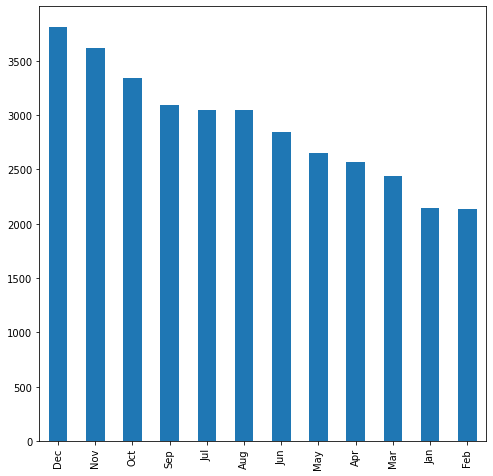

In [150]:

plt.figure(figsize=(8, 8))
loan_df["issue_month"].value_counts().plot.bar()
plt.savefig("issue_month.png")
plt.show()

# Bivariate Analysis

## Loan Amount v/s Funded Amount v/s Funded Amount Invested

Overall, the Sanctioned loan amount is lower than both the approved and requested loan amounts.



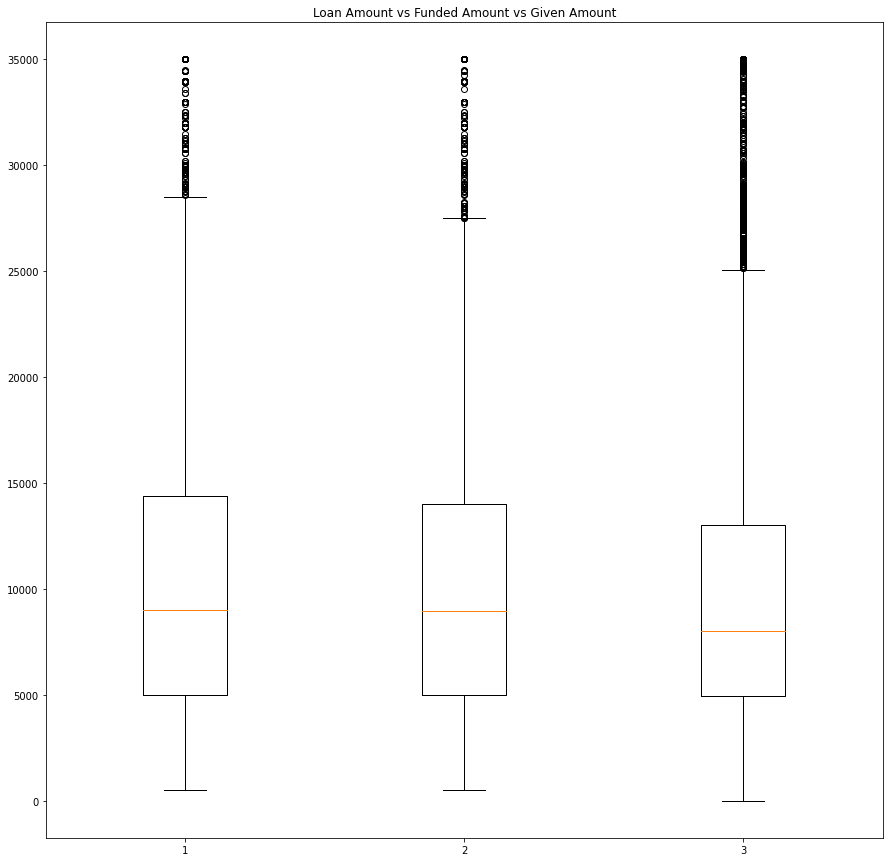

In [80]:
Loan_Amount = loan_df["loan_amnt"]
Funded_Amount = loan_df["funded_amnt"]
Invested_Amount = loan_df["funded_amnt_inv"]
plt.figure(figsize=(15, 15))
plt.boxplot([Loan_Amount, Funded_Amount, Invested_Amount])
plt.title("Loan Amount vs Funded Amount vs Given Amount")
plt.savefig("Loan_Funded_amount.png")
plt.show()

## 2. Loan Status vs Annual Income
From the below data, people with lower salary are mory likely default on loans
People who have paid off the loans are closer to the mean salary.
People who have defaulted have lower than mean salary.

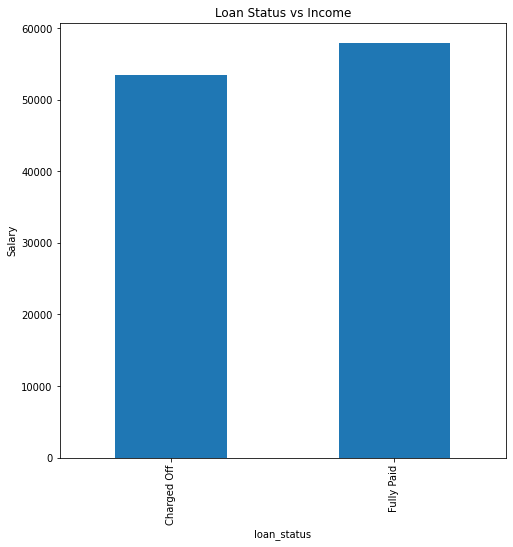

In [161]:
plt.figure(figsize=(8, 8))
loan_df.groupby(by=["loan_status"])["annual_inc"].mean().plot.bar()
plt.title("Loan Status vs Income")
plt.ylabel("Salary")
plt.savefig("loan_status_income.png")
plt.show()

In [160]:
loan_df.groupby(by=["loan_status"])["annual_inc"].mean()

loan_status
Charged Off    53491.457807
Fully Paid     57864.594882
Name: annual_inc, dtype: float64

In [162]:
loan_df["annual_inc"].describe()

count     34723.000000
mean      57209.940431
std       23615.526637
min        4000.000000
25%       39600.000000
50%       54912.000000
75%       73600.000000
max      115000.000000
Name: annual_inc, dtype: float64

## 3. Loan Status vs Funded Amount

From below data, people who default take up more loan compared to those who have full paid off.

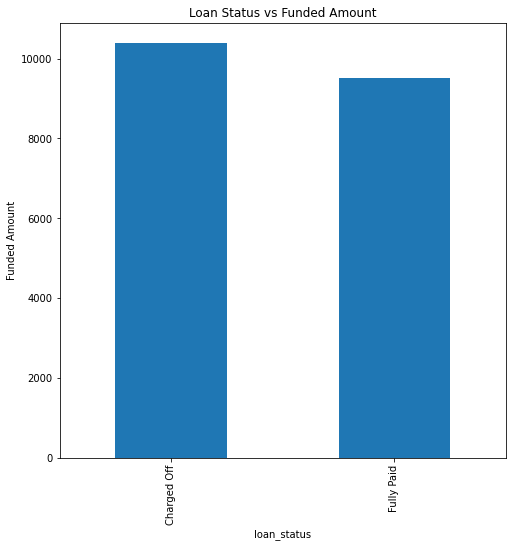

In [164]:
plt.figure(figsize=(8, 8))
loan_df.groupby(by=["loan_status"])["funded_amnt_inv"].mean().plot.bar()
plt.title("Loan Status vs Funded Amount")
plt.ylabel("Funded Amount")
plt.savefig("loan_funded_amount.png")
plt.show()

In [204]:
loan_df.groupby(by=["loan_status"])["funded_amnt_inv"].mean()

loan_status
Charged Off    10380.308567
Fully Paid      9511.652529
Name: funded_amnt_inv, dtype: float64

In [205]:
loan_df["funded_amnt_inv"].describe()

count    34723.000000
mean      9641.689510
std       6537.101329
min          0.000000
25%       4945.220654
50%       8000.000000
75%      13000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

## 3. Loan Status vs Purpose

Both the number of loans applied and defaulted are highest in number for "debt_consolidation".

Around 48% of total loans that were defaulted were taken for "debt consolidation"

In [168]:
loan_df[loan_df["loan_status"] == "Charged Off"]["purpose"].value_counts()

debt_consolidation    2576
other                  579
credit_card            496
small_business         435
home_improvement       301
major_purchase         210
car                    153
medical                 99
moving                  89
wedding                 88
educational             53
vacation                51
house                   50
renewable_energy        18
Name: purpose, dtype: int64

In [169]:
loan_df[loan_df["loan_status"] != "Charged Off"]["purpose"].value_counts()

debt_consolidation    13912
credit_card            4000
other                  2965
home_improvement       2013
major_purchase         1737
car                    1235
small_business         1077
wedding                 756
medical                 510
moving                  427
vacation                301
house                   269
educational             252
renewable_energy         71
Name: purpose, dtype: int64

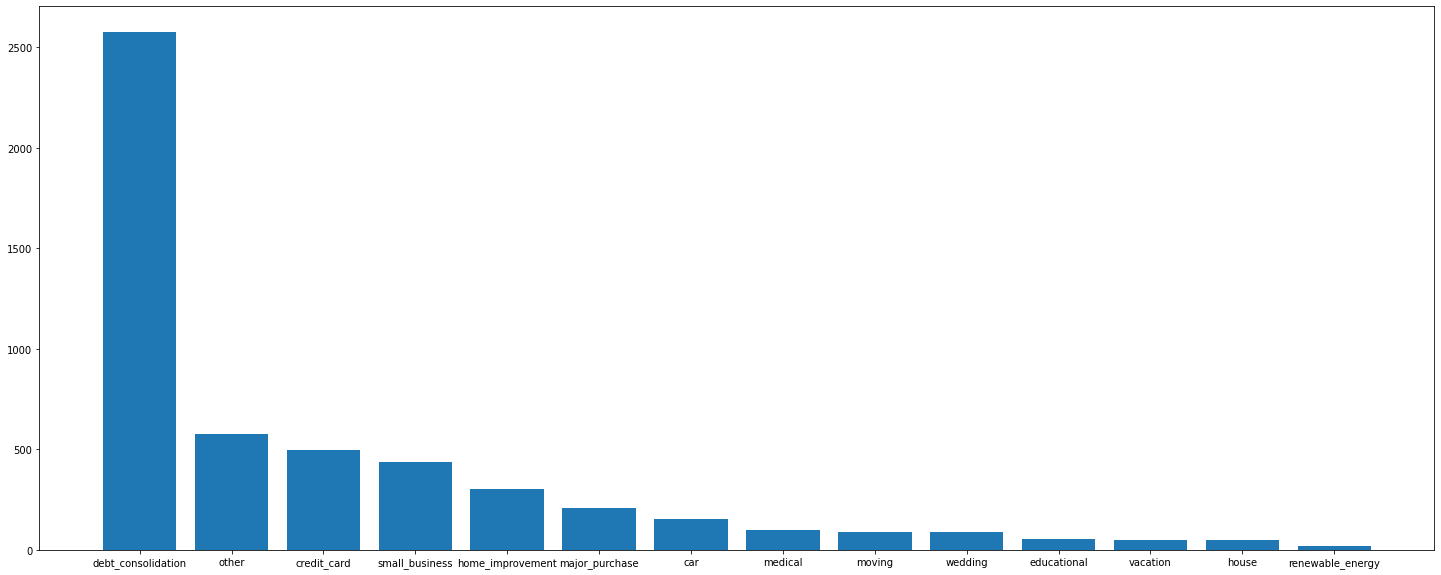

In [167]:
purpose = list(loan_df[loan_df["loan_status"] == "Charged Off"]["purpose"].value_counts().index)
count = list(loan_df[loan_df["loan_status"] == "Charged Off"]["purpose"].value_counts().values)
plt.figure(figsize=(25, 10))
plt.bar(purpose, count)
plt.savefig("loan_purpose.png")
plt.show()

## 4. Loan Status vs Term

In [170]:
loan_df.groupby(by=["term", "loan_status"])["loan_status"].count()

term        loan_status
 36 months  Charged Off     3003
            Fully Paid     23338
 60 months  Charged Off     2195
            Fully Paid      6187
Name: loan_status, dtype: int64

#### 11% of people who took 36 month term plan defaulted on their loans
#### 25.31% of people who took 60 months term plan defaulted on their loans

#### People who take 60 month loan tend to default twice as much as those who take 36 month loan

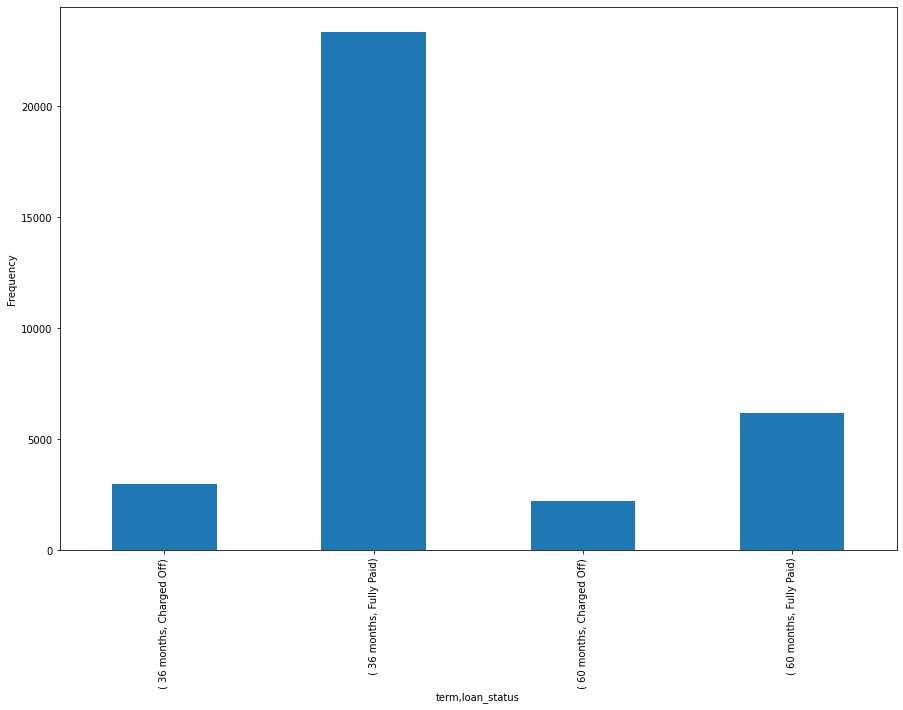

In [173]:
plt.figure(figsize=(15, 10))
plt.ylabel("Frequency")
loan_df.groupby(by=["term", "loan_status"])["loan_status"].count().plot.bar()
plt.savefig("loan_term.png")
plt.show()

## 4. Interest Rate vs Loan Status

People who default pay 2.2% more interest rate than those who don't.

In [207]:
loan_df.groupby(by=["loan_status"])["int_rate"].mean()

loan_status
Charged Off    13.715362
Fully Paid     11.535906
Name: int_rate, dtype: float64

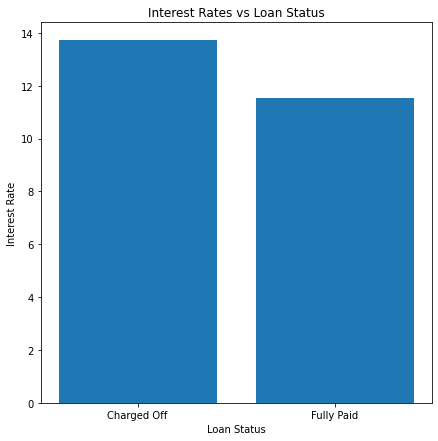

In [206]:
purpose = list(loan_df.groupby(by=["loan_status"])["int_rate"].mean().index)
count = list(loan_df.groupby(by=["loan_status"])["int_rate"].mean().values)
plt.figure(figsize=(7, 7))
plt.bar(purpose, count)
plt.title("Interest Rates vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")
plt.show()


In [208]:
loan_df["int_rate"].mean()

11.86216859142355

## 5. DTI vs Loan Status

#### People who default/charged off take larger loans w.r.t their income than those who have fully paid

In [52]:
loan_df.groupby(by=["loan_status"])["dti"].mean()

loan_status
Charged Off    14.000624
Fully Paid     13.148421
Name: dti, dtype: float64

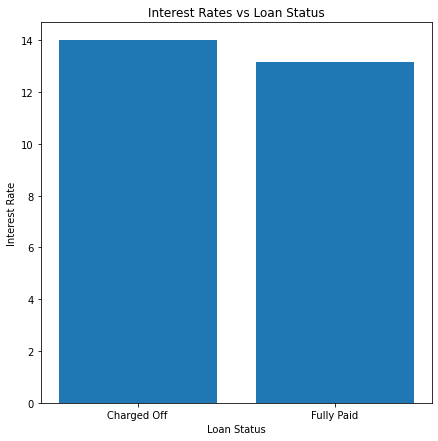

In [53]:
dti = list(loan_df.groupby(by=["loan_status"])["dti"].mean().index)
count = list(loan_df.groupby(by=["loan_status"])["dti"].mean().values)
plt.figure(figsize=(7, 7))
plt.bar(dti, count)
plt.title("Interest Rates vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")
plt.show()

## 6. Employment Length vs Loan Status

Below I have plotted a bar graph to see the correlation between Employment Length and Defaulted people.
There is no clear distinction to derive  meaning from it.

People with employment length greater than 10 years have higher default percentage at ~16% than others.


In [83]:
# loan_df.groupby(by=["emp_length", "loan_status"])["loan_status"].count()

In [174]:
idx_lst = list(loan_df.groupby(by=["emp_length", "loan_status"])["loan_status"].count().index)
values_lst = (loan_df.groupby(by=["emp_length", "loan_status"])["loan_status"].count().values)

In [175]:
total_based_on_emp_length =  list(loan_df.groupby(by=["emp_length"])["loan_status"].count().values)

charged_off_emp_length = []
for i in range(0, len(values_lst), 2):
    charged_off_emp_length.append(values_lst[i])

charged_percent_emp_length = []
for i, j in zip(charged_off_emp_length, total_based_on_emp_length):
    percnt = (i/j) * 100
    charged_percent_emp_length.append(percnt)


index_lst = list(loan_df.groupby(by=["emp_length"])["loan_status"].count().index)

final_dict = {}
for i, j in enumerate(charged_percent_emp_length):
    final_dict[index_lst[i]] = j

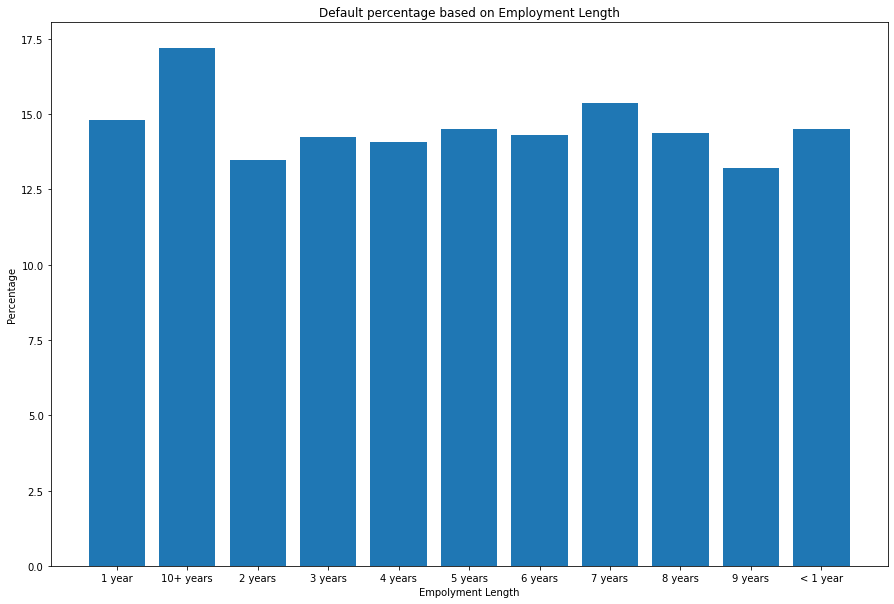

In [177]:
names = list(final_dict.keys())
values = list(final_dict.values())

plt.figure(figsize=(15, 10))
plt.bar(range(len(final_dict)), values, tick_label=names)
plt.title("Default percentage based on Employment Length")
plt.xlabel("Empolyment Length")
plt.ylabel("Percentage")
plt.savefig("loan_emp_length.png")
plt.show()

In [78]:
# plt.figure(figsize=(25, 10))
# plt.ylabel("Frequency")
# loan_df.groupby(by=["emp_length", "loan_status"])["loan_status"].count().plot.bar()
# plt.show()

## 7. Grade vs Loan Status

Default percentage increases progressively/linearly as the grade of the loan increases. 

A being the best - meaning that the customer is least likely to default

In [181]:
idx_lst = list(loan_df.groupby(by=["grade", "loan_status"])["loan_status"].count().index)
values_lst = (loan_df.groupby(by=["grade", "loan_status"])["loan_status"].count().values)

In [182]:
total_based_on_grade =  list(loan_df.groupby(by=["grade"])["loan_status"].count().values)

charged_off_grade = []
for i in range(0, len(values_lst), 2):
    charged_off_grade.append(values_lst[i])

charged_percent_grade = []
for i, j in zip(charged_off_grade, total_based_on_grade):
    percnt = (i/j) * 100
    charged_percent_grade.append(percnt)


index_lst_grade = list(loan_df.groupby(by=["grade"])["loan_status"].count().index)

final_dict_grade = {}
for i, j in enumerate(charged_percent_grade):
    final_dict_grade[index_lst_grade[i]] = j
    
print(final_dict_grade)

{'A': 6.301190346183248, 'B': 12.640635340833887, 'C': 17.969956479011653, 'D': 22.48248686514886, 'E': 27.409372236958447, 'F': 33.25092707045735, 'G': 38.76651982378855}


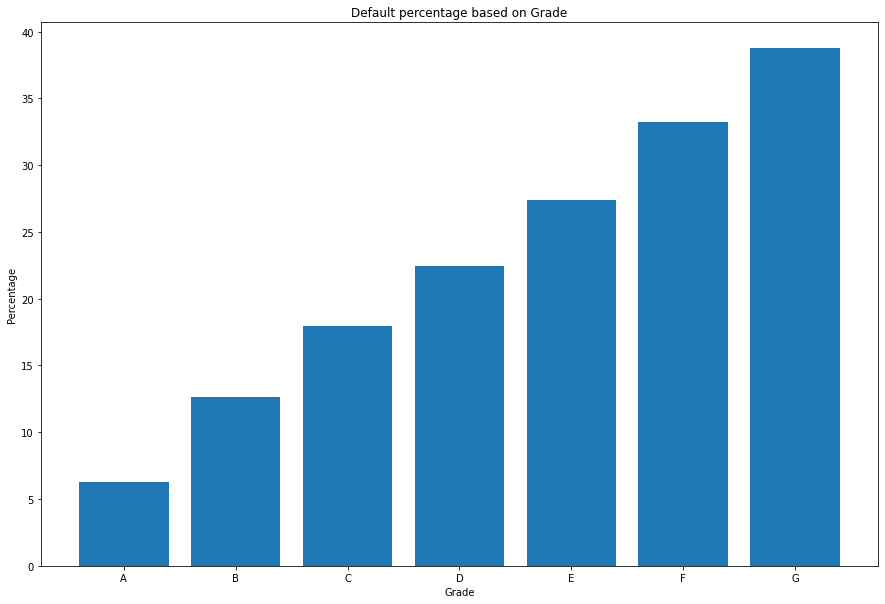

In [183]:
names = list(final_dict_grade.keys())
values = list(final_dict_grade.values())

plt.figure(figsize=(15, 10))
plt.bar(range(len(final_dict_grade)), values, tick_label=names)
plt.title("Default percentage based on Grade")
plt.xlabel("Grade")
plt.ylabel("Percentage")
plt.savefig("loan_grade.png")
plt.show()

## Term vs Funded Amount Invested

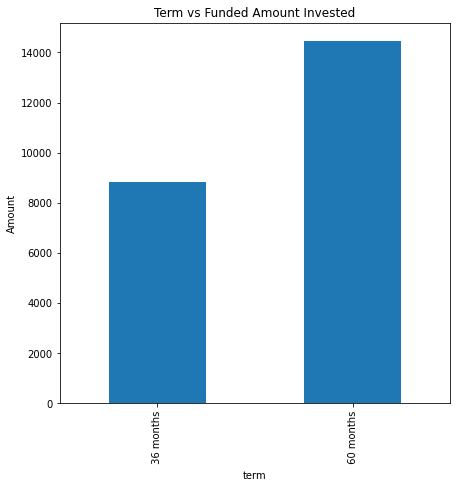

In [104]:
# 36 months -->
plt.figure(figsize=(7, 7))
loan_df.groupby(by=["term"])["funded_amnt_inv"].mean().plot.bar()
plt.title("Term vs Funded Amount Invested")
plt.ylabel("Amount")
plt.show()

## Issue Month vs Loan Status

Loans issued during late months of a year lead to higher possibility of defaults.

Highest number of defaults in a month was for December

Text(0.5, 0, 'Month')

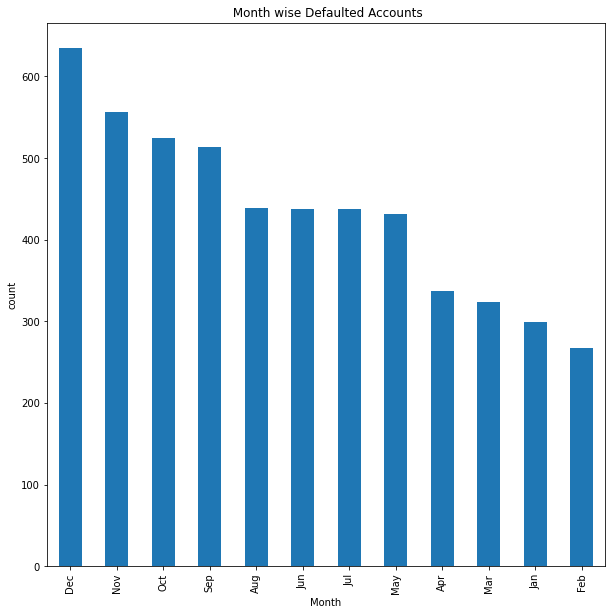

In [192]:
plt.figure(figsize=(10, 10))
loan_df[loan_df["loan_status"] == "Charged Off"]["issue_month"].value_counts().plot.bar()
plt.title(" Month wise Defaulted Accounts")
plt.ylabel("count")
plt.xlabel("Month")

## Employment Length vs Funded Amount

People with longer working history get approved for larger amounts.

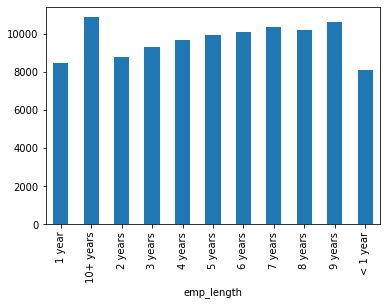

In [193]:
loan_df.groupby(by=["emp_length"])["funded_amnt_inv"].mean().plot.bar()
plt.show()

## Grade vs Interest Rate

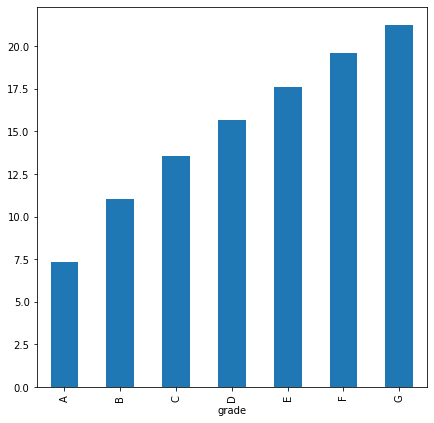

In [197]:
plt.figure(figsize=(7,7))
loan_df.groupby(by=["grade"])["int_rate"].mean().plot.bar()
plt.show()

# Obersvations:
# Probability of Defaulting is when:
# 1. Annual salary is below the mean value.
# 2  Funded_amnt_inv is above the mean value
# 3. 60 month term plan is taken. 25% of all people who took this defaulted
# 4. Interest rate is above the mean value of 11.86. Average interest rate of people who defaulted is 13.7%
# 5. When employment length is greater than 10 years. Default rate of people with 10+ years of employment length is ~16%